# Capstone Final Project on Propensify model

In [1]:
# Loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importing the dataset into a DataFrame

df_train=pd.read_excel(r'C:\\Users\\veenu\\Downloads\\Propensify\\train.xlsx')

In [3]:
# Displaying all columns in the dataset with pandas

pd.set_option('display.max_columns', None) 

In [4]:
# Examining the dimensions of the dataset

df_train.shape

(8240, 24)

In [5]:
# Observing the initial 5 rows in the DataFrame

df_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [6]:
# Listing the columns in the DataFrame

df_train.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [7]:
# Examining data types and missing values in the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [8]:
# Generating summary statistics for numerical columns

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
custAge,6224.0,39.953728,10.540516,18.00000,32.000,38.000,47.000,94.000
campaign,8238.0,2.531682,2.709773,1.00000,1.000,2.000,3.000,40.000
pdays,8238.0,960.916606,190.695054,0.00000,999.000,999.000,999.000,999.000
previous,8238.0,0.183054,0.514209,0.00000,0.000,0.000,0.000,6.000
emp.var.rate,8238.0,0.056397,1.566550,-3.40000,-1.800,1.100,1.400,1.400
cons.price.idx,8238.0,93.570977,0.578782,92.20100,93.075,93.444,93.994,94.767
cons.conf.idx,8238.0,-40.577907,4.650101,-50.80000,-42.700,-41.800,-36.400,-26.900
euribor3m,8238.0,3.586929,1.742784,0.63400,1.334,4.857,4.961,5.045
nr.employed,8238.0,5165.575965,72.727423,4963.60000,5099.100,5191.000,5228.100,5228.100
pmonths,8238.0,960.687436,191.841012,0.00000,999.000,999.000,999.000,999.000


In [9]:
# Filter categorical columns and get summary statistics

df_train.describe(include=object)

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
count,8238,8238,5832,8238,8238,8238,8238,8238,7451,8238,8238
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,2102,4957,1731,6619,4300,6775,5243,2814,1598,7060,7310


In [10]:
# The target column, 'responded,' reveals whether potential customers answered 'yes' or 'no' to the company's marketing outreach.
# This indicates that the dataset is highly imbalanced, with the 'no' responses significantly outnumbering the 'yes' responses. Addressing this imbalance will require implementing specific strategies based on the goals and needs of the dataset.

df_train['responded'].value_counts(normalize=True)*100

responded
no     88.73513
yes    11.26487
Name: proportion, dtype: float64

In [11]:
# The 'id' column is irrelevant to our modeling outcomes, so we will drop it. 
#Additionally, the 'Profit' feature appears to be unrelated to the prediction, so it will also be excluded.

df_train.drop(columns=['id','profit'], axis=1,inplace=True)

In [12]:
# The dimensions of the dataset after removing the columns will be:
df_train.shape

(8240, 22)

In [13]:
# We will examine the dataset for any null values and identify which features contain them.

df_train.isna().sum()

custAge           2016
profession           2
marital              2
schooling         2408
default              2
housing              2
loan                 2
contact              2
month                2
day_of_week        789
campaign             2
pdays                2
previous             2
poutcome             2
emp.var.rate         2
cons.price.idx       2
cons.conf.idx        2
euribor3m            2
nr.employed          2
pmonths              2
pastEmail            2
responded            2
dtype: int64

In [14]:
# Remove null values from specific columns in the DataFrame.
df_train.dropna(subset=['profession', 'marital', 'default', 'housing',
                        'loan', 'contact', 'month', 'campaign', 'pdays',
                        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                        'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths',
                        'pastEmail', 'responded'], inplace=True)


In [15]:
#Verify the total number of null values left in the dataset after dropping the specified columns.

df_train.isna().sum()

custAge           2014
profession           0
marital              0
schooling         2406
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        787
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [16]:
# Count the occurrences of each category within the 'profession' column.
df_train['profession'].value_counts()

profession
admin.           2102
blue-collar      1847
technician       1351
services          792
management        583
retired           337
entrepreneur      314
self-employed     279
housemaid         213
unemployed        190
student           159
unknown            71
Name: count, dtype: int64

In [17]:
# Compute the average value for each category within the 'profession' column.
mean_by_profession = df_train.groupby('profession')['custAge'].mean().round()

mean_by_profession

profession
admin.           38.0
blue-collar      39.0
entrepreneur     42.0
housemaid        46.0
management       42.0
retired          63.0
self-employed    40.0
services         38.0
student          26.0
technician       38.0
unemployed       39.0
unknown          47.0
Name: custAge, dtype: float64

In [18]:
# Fill in missing values in the 'profession' column using the mean values for each category.
df_train['custAge'] = df_train.apply(lambda row: mean_by_profession[row['profession']] if pd.isna(row['custAge']) else row['custAge'], axis=1)


In [19]:
# Verify if there are any remaining null values after the imputation process.

df_train.isna().sum()

custAge              0
profession           0
marital              0
schooling         2406
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        787
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [20]:
df_train['schooling'].value_counts()

schooling
university.degree      1731
high.school            1340
basic.9y                863
professional.course     738
basic.4y                586
basic.6y                313
unknown                 260
illiterate                1
Name: count, dtype: int64

In [21]:
# Create a cross-tabulation to summarize the relationship between the two columns.

cross_tab = pd.crosstab(df_train['schooling'], df_train['profession'], normalize='index') * 100
cross_tab

profession,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
schooling,,,,,,,,,,,,
basic.4y,2.047782,55.802048,4.436860,10.409556,2.389078,14.675768,1.706485,3.242321,0.341297,0.853242,2.730375,1.365188
basic.6y,8.626198,61.022364,1.597444,4.792332,4.472843,4.153355,0.000000,10.543131,0.638978,3.194888,0.958466,0.000000
basic.9y,7.184241,61.413673,3.012746,2.085747,2.201622,1.738123,4.287370,6.836616,0.926999,6.604867,3.128621,0.579374
high.school,36.268657,8.805970,2.686567,1.492537,3.358209,2.313433,1.567164,27.985075,3.358209,9.179104,2.686567,0.298507
illiterate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
professional.course,7.046070,9.756098,3.387534,1.761518,1.897019,4.065041,2.303523,4.065041,0.948509,62.466125,2.032520,0.271003
university.degree,47.198151,0.693241,5.661467,1.270942,16.811092,2.195263,5.430387,1.328712,1.213172,16.233391,1.559792,0.404391
unknown,16.538462,25.000000,3.461538,3.846154,6.923077,6.153846,1.923077,5.384615,9.230769,10.769231,0.384615,10.384615


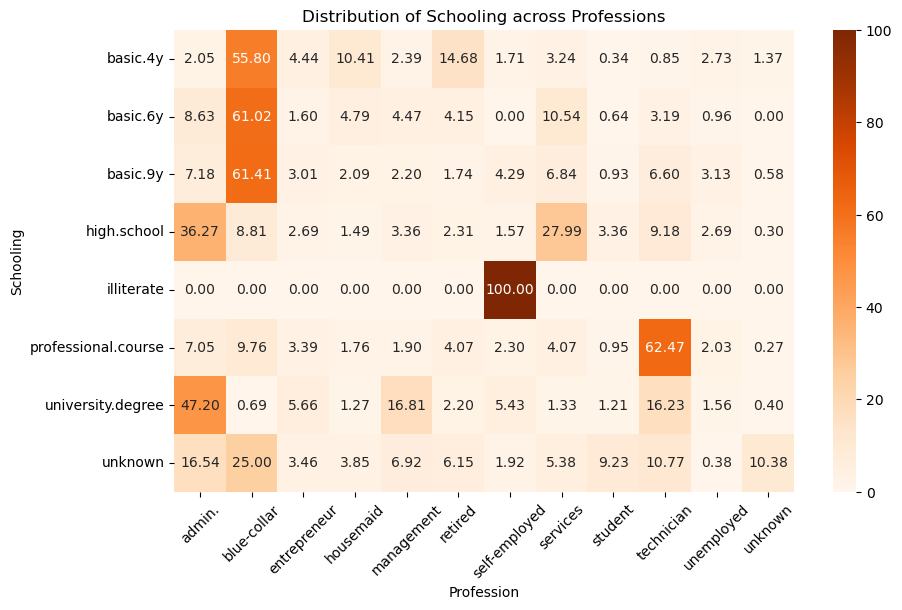

In [22]:
# generate a heatmap to visualize the correlation between the columns 
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, cmap='Oranges', fmt='.2f')
plt.title('Distribution of Schooling across Professions')
plt.xlabel('Profession')
plt.ylabel('Schooling')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [23]:
# Impute missing values in the 'education' column using information from the 'profession' column.
mapping = {
    'blue-collar' : 'basic.4y',
    'blue-collar' : 'basic.6y',
    'blue-collar' : 'basic.9y',
    'self-employed': 'illiterate',
    'technician'   : 'professional.course',
    'admin.'        : 'university.degree',
    'services'      : 'high.school',
    'management'    : 'university.degree',
    'retired'       : 'unknown',
    'entrepreneur'  : 'university.degree'
}

In [24]:
# Apply the fillna method to replace null values by referencing the values in the provided dictionary.

df_train['schooling'].fillna(df_train['profession'].map(mapping), inplace=True)


In [25]:
# Check the sum of null values after imputation to see if any missing values remain.

df_train['schooling'].isna().sum()

187

In [26]:
df_train.isna().sum()

custAge             0
profession          0
marital             0
schooling         187
default             0
housing             0
loan                0
contact             0
month               0
day_of_week       787
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
pmonths             0
pastEmail           0
responded           0
dtype: int64

In [27]:
df_train['schooling'].value_counts()

schooling
university.degree      2591
high.school            1579
basic.9y               1395
professional.course    1124
basic.4y                586
unknown                 368
basic.6y                313
illiterate               95
Name: count, dtype: int64

In [28]:
# Replace the remaining null values with 'unknown'.

df_train['schooling'].fillna('unknown', inplace=True)


In [29]:
df_train.isna().sum()

custAge             0
profession          0
marital             0
schooling           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week       787
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
pmonths             0
pastEmail           0
responded           0
dtype: int64

In [30]:
# From the previous analysis, it is evident that there are 787 missing values in the 'day_of_week' column.

df_train['day_of_week'].value_counts()

day_of_week
mon    1598
thu    1533
tue    1478
wed    1473
fri    1369
Name: count, dtype: int64

In [31]:
import numpy as np

# the list of days of the week as follows:
days_list = ['mon', 'tue', 'wed', 'thu', 'fri']

# Replace null values in the 'day_of_week' column with random selections from the list of days.
df_train['day_of_week'] = df_train['day_of_week'].fillna(np.random.choice(days_list))


In [32]:
# Our DataFrame is now ready for analysis as it no longer contains any null values.

df_train.isna().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [33]:
df_train['contact'].value_counts()

contact
cellular     5243
telephone    2995
Name: count, dtype: int64

In [34]:
df_train.describe(include=object)

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
count,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,fri,nonexistent,no
freq,2102,4957,2591,6619,4300,6775,5243,2814,2156,7060,7310


In [35]:
df_train['poutcome'].value_counts()

poutcome
nonexistent    7060
failure         895
success         283
Name: count, dtype: int64

C:\Users\veenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x1400 with 0 Axes>

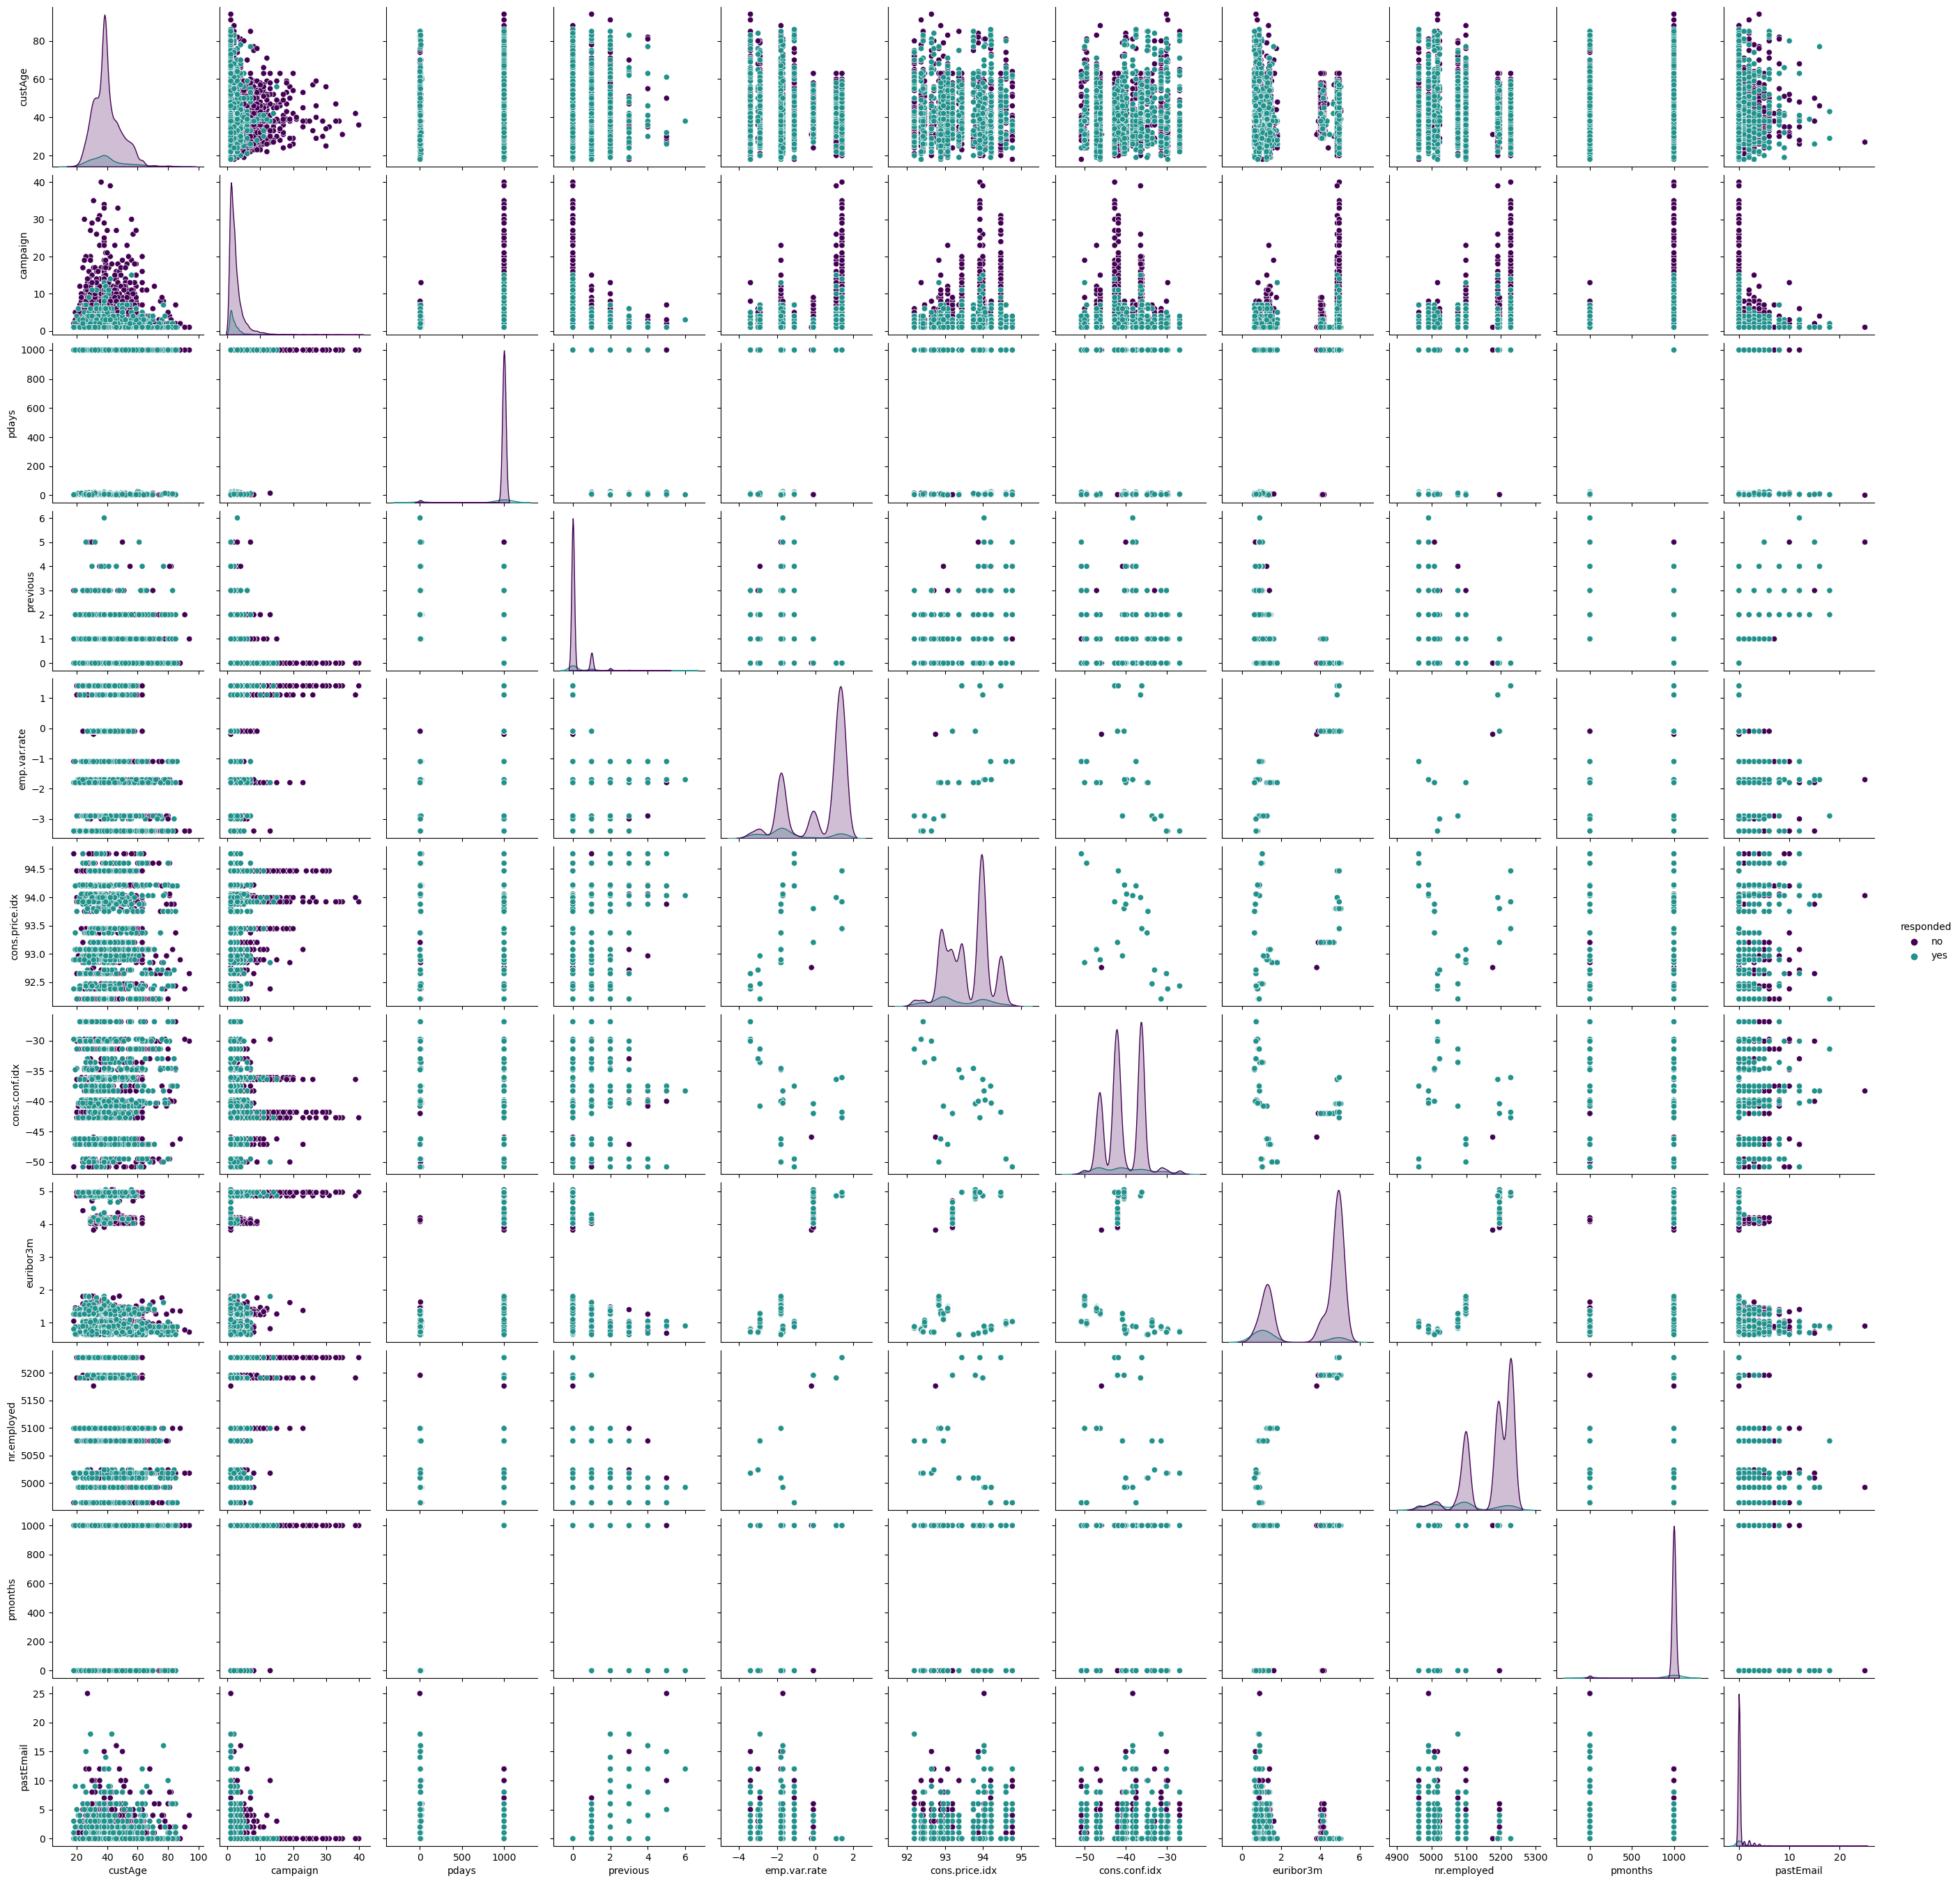

In [36]:
# pair plot for more insights 

# Create a figure with a specific size
plt.figure(figsize=(16, 14))

# Define a colormap
colormap = sns.color_palette("viridis", as_cmap=True)

# Convert colormap to a list of colors
n_colors = len(df_train['responded'].unique())
colors = [colormap(i / n_colors) for i in range(n_colors)]

# Plot with the custom color list
sns.pairplot(df_train, hue='responded', palette=colors)
plt.show()

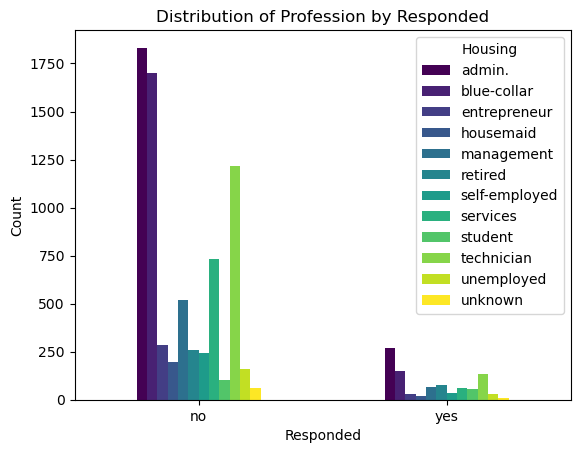

In [37]:
##To visualize the distribution of 'housing' values based on 'responded'

# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting the value counts with a custom color palette

df_train.groupby(['responded', 'profession']).size().unstack().plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Distribution of Profession by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

In [38]:
#Replace 'unknown' with 'single' in the specified column.
#Update the DataFrame accordingly.

df_train['marital'] = df_train['marital'].replace('unknown', 'single')



In [39]:
df_train['marital'].value_counts()

marital
married     4957
single      2349
divorced     932
Name: count, dtype: int64

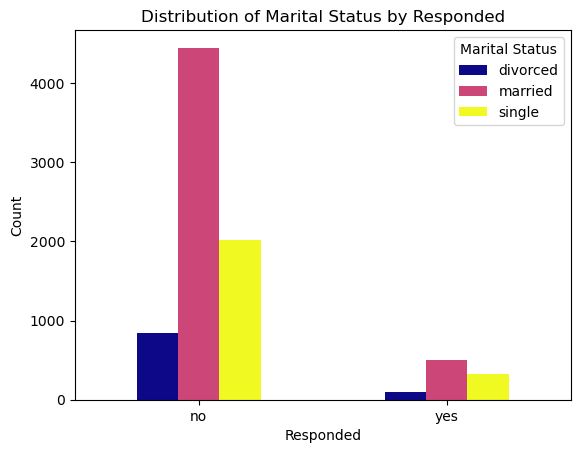

In [40]:
##To plot the value counts of 'housing' based on 'responded', you can use a count plot to visualize how the distribution of 'housing' categories varies with the 'responded' column.

df_train.groupby(['responded', 'marital']).size().unstack().plot(kind='bar', stacked=False, colormap='plasma')
plt.title('Distribution of Marital Status by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Marital Status')
plt.show()






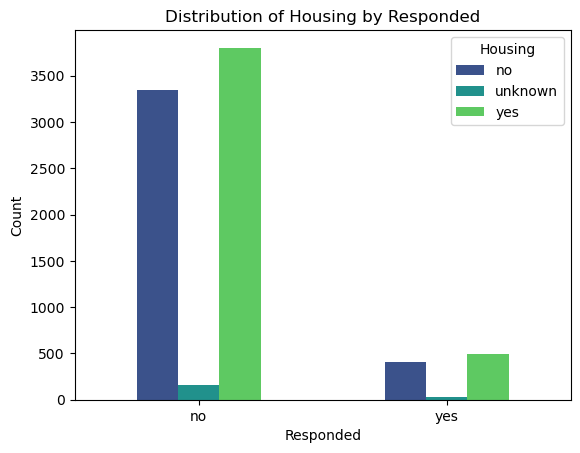

In [41]:
##Visualize the distribution of 'housing' values with respect to the 'responded' column by plotting their counts.

# Define a Seaborn color palette
palette = sns.color_palette("viridis", n_colors=len(df_train['housing'].unique()))

# Plot with Seaborn color palette
df_train.groupby(['responded', 'housing']).size().unstack().plot(kind='bar', stacked=False, color=palette)
plt.title('Distribution of Housing by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

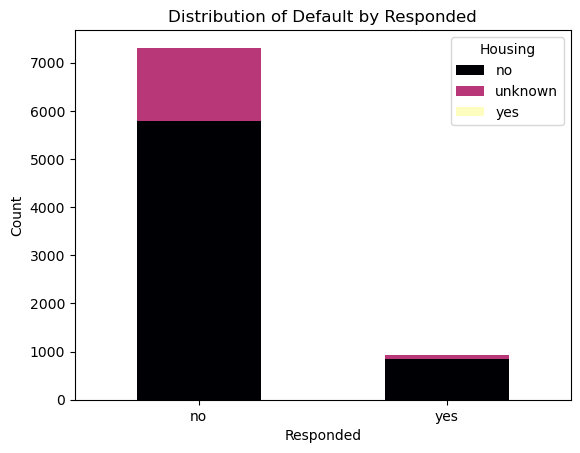

In [42]:
## Create a plot to display the counts of each 'housing' category, segmented by 'responded' values.

# Plot with a different built-in colormap
df_train.groupby(['responded', 'default']).size().unstack().plot(kind='bar', stacked=True, colormap='magma')
plt.title('Distribution of Default by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Housing')
plt.show()

In [43]:
df_train['default'].value_counts()

default
no         6619
unknown    1618
yes           1
Name: count, dtype: int64

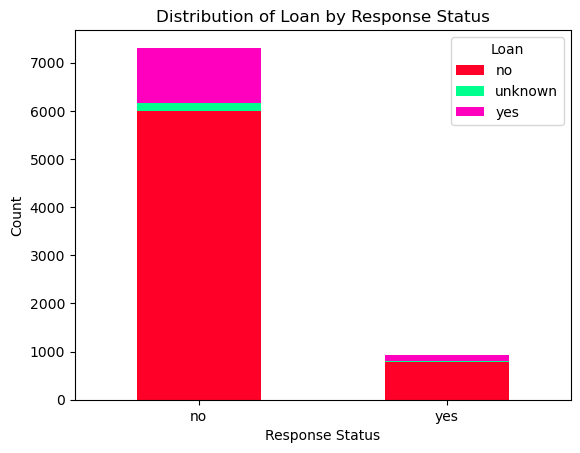

In [44]:
# Create a stacked bar plot to show the distribution of housing types by response status
df_train.groupby(['responded', 'loan']).size().unstack().plot(kind='bar', stacked=True, colormap='gist_rainbow')
plt.title('Distribution of Loan by Response Status')
plt.xlabel('Response Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan')
plt.show()

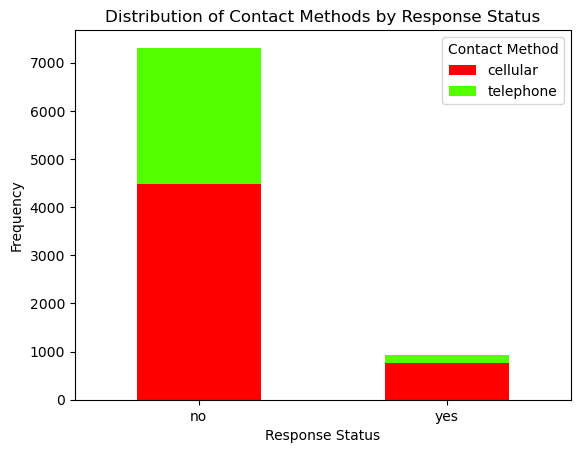

In [45]:
# #Visualize the counts of 'housing' categories with respect to the 'responded' column.

# Generate the stacked bar plot with the color dictionary
df_train.groupby(['responded', 'contact']).size().unstack().plot(kind='bar', stacked=True, colormap='prism')
plt.title('Distribution of Contact Methods by Response Status')
plt.xlabel('Response Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Contact Method')
plt.show()

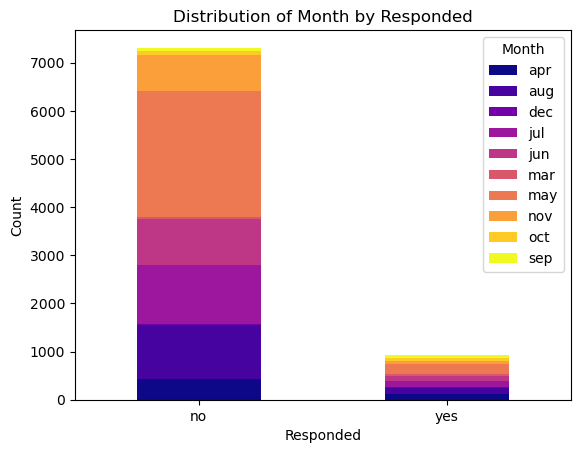

In [46]:
# Generate a stacked bar plot to illustrate how housing categories are distributed based on response status
df_train.groupby(['responded', 'month']).size().unstack().plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Distribution of Month by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Month')
plt.show()

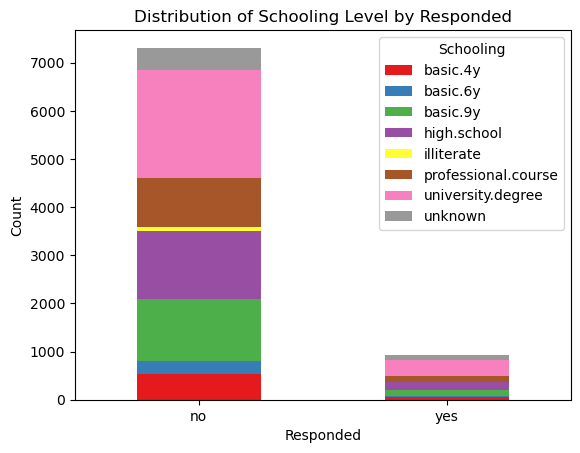

In [47]:
# # Plotting the value counts of 'housing' based on 'responded'

df_train.groupby(['responded', 'schooling']).size().unstack().plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Distribution of Schooling Level by Responded')
plt.xlabel('Responded')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Schooling')
plt.show()

In [48]:
df_train['schooling'].value_counts()

schooling
university.degree      2591
high.school            1579
basic.9y               1395
professional.course    1124
basic.4y                586
unknown                 555
basic.6y                313
illiterate               95
Name: count, dtype: int64

In [49]:
# Reexamine the descriptive statistics for the continuous variables.
df_train.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,39.924253,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501
std,9.547176,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,34.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000


In [50]:
df_train['previous'].value_counts()

previous
0.0    7060
1.0     947
2.0     165
3.0      43
4.0      14
5.0       8
6.0       1
Name: count, dtype: int64

In [51]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
!pip install imblearn

In [53]:
# Sample data for 'pdays'
data_pdays = {
    'pdays': [999.0, 6.0, 3.0, 4.0, 9.0, 7.0, 2.0, 12.0, 10.0, 5.0, 13.0, 14.0, 15.0, 11.0, 16.0, 1.0, 0.0, 8.0, 17.0,
              19.0, 25.0, 21.0, 22.0]
}
df_pdays = pd.DataFrame(data_pdays)

# Calculate the Interquartile Range (IQR) for 'pdays'
Q1_pdays = df_pdays['pdays'].quantile(0.25)
Q3_pdays = df_pdays['pdays'].quantile(0.75)
IQR_pdays = Q3_pdays - Q1_pdays

# Determine lower and upper bounds for 'pdays'
lower_bound_pdays = Q1_pdays - 1.5 * IQR_pdays
upper_bound_pdays = Q3_pdays + 1.5 * IQR_pdays

# Identify significant outliers or cutoff value for 'pdays'
significant_outliers_pdays = df_pdays[(df_pdays['pdays'] < lower_bound_pdays) | (df_pdays['pdays'] > upper_bound_pdays)]

print(f"Interquartile Range (IQR) for 'pdays': {IQR_pdays}")
print(f"Lower Bound (pdays): {lower_bound_pdays}, Upper Bound (pdays): {upper_bound_pdays}")
print(f"Significant Outliers (pdays):\n{significant_outliers_pdays}")

Interquartile Range (IQR) for 'pdays': 11.0
Lower Bound (pdays): -11.0, Upper Bound (pdays): 33.0
Significant Outliers (pdays):
   pdays
0  999.0


In [54]:

# Sample data for 'pmonths'
data_pmonths = {
    'pmonths': [0.000000, 0.033333, 0.066667, 0.100000, 0.133333, 0.166667, 0.200000, 0.233333, 0.266667,
                0.300000, 0.333333, 0.366667, 0.400000, 0.433333, 0.466667, 0.500000, 0.533333, 0.566667,
                0.633333, 0.700000, 0.733333, 0.833333, 999.000000]
}
df_pmonths = pd.DataFrame(data_pmonths)

# Calculate the Interquartile Range (IQR)
Q1 = df_pmonths['pmonths'].quantile(0.25)
Q3 = df_pmonths['pmonths'].quantile(0.75)
IQR = Q3 - Q1

# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify significant outliers or cutoff value
significant_outliers_pmonths = df_pmonths[(df_pmonths['pmonths'] < lower_bound) | (df_pmonths['pmonths'] > upper_bound)]

print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Significant Outliers (pmonths):\n{significant_outliers_pmonths}")


Interquartile Range (IQR): 0.3666665
Lower Bound: -0.36666624999999997, Upper Bound: 1.09999975
Significant Outliers (pmonths):
    pmonths
22    999.0


In [55]:
# categorize the 'pdays' data into meaningful groups.
conditions = [
    (df_train['pdays'] == 999),
    (df_train['pdays'] < 10),
    (df_train['pdays'] >= 10),
]

choices = ['first visit', 'less than 10 days','greater than 10 days']

# Generate the 'pduration' column according to the specified criteria.
df_train['pduration'] = np.select(conditions, choices, default='unknown')

#categorize 'pmonths' into meaningful groups.
conditions = [
    (df_train['pmonths'] == 999),
    (df_train['pmonths'] <= 0.3),
    (df_train['pmonths'] > 0.3)
]

choices = ['first visit', 'less than 2 months',  'greater than 2 months']

# Construct the 'pduration' column based on given conditions.
df_train['pduration_m'] = np.select(conditions, choices, default='unknown')

In [56]:
df_train['pduration'].value_counts()

pduration
first visit             7922
less than 10 days        264
greater than 10 days      52
Name: count, dtype: int64

In [57]:
df_train['pduration_m'].value_counts()

pduration_m
first visit              7922
less than 2 months        264
greater than 2 months      52
Name: count, dtype: int64

In [58]:
df_train['pmonths'].value_counts().sort_index()

pmonths
0.000000         3
0.033333         4
0.066667        13
0.100000        86
0.133333        25
0.166667         7
0.200000        90
0.233333        16
0.266667         3
0.300000        17
0.333333         8
0.366667         5
0.400000        12
0.433333         6
0.466667         6
0.500000         5
0.533333         4
0.566667         2
0.633333         1
0.700000         1
0.733333         1
0.833333         1
999.000000    7922
Name: count, dtype: int64

In [59]:
df_train['pdays'].value_counts().sort_index()

pdays
0.0         3
1.0         4
2.0        13
3.0        86
4.0        25
5.0         7
6.0        90
7.0        16
8.0         3
9.0        17
10.0        8
11.0        5
12.0       12
13.0        6
14.0        6
15.0        5
16.0        4
17.0        2
19.0        1
21.0        1
22.0        1
25.0        1
999.0    7922
Name: count, dtype: int64

In [60]:
# Apply one-hot encoding to categorical variables and normalize continuous variables
# Remove the target variable and any columns that are not relevant.
X = df_train.drop(['responded', 'pdays','pmonths'], axis=1)
y = df_train['responded']

# Convert categorical columns into a format that can be used by machine learning models by applying one-hot encoding.
X_encoded = pd.get_dummies(X, columns=['loan', 'marital', 'schooling', 'default', 'housing', 'day_of_week',
                                       'poutcome', 'pduration','pduration_m','profession','month','contact' ],drop_first=True)

# Normalize continuous columns to ensure they are on a comparable scale.
continuous_columns = ['custAge','campaign','previous', 'emp.var.rate','cons.price.idx','cons.conf.idx',
                      'euribor3m','nr.employed','pastEmail'
                       ]

In [61]:
# Select the continuous columns from 'X_encoded'.
X_continuous = X_encoded[continuous_columns]

# Standardize the data using StandardScaler.
scaler = StandardScaler()

# Apply the transformation to the data using the fitted model.
X_continuous_normalized = scaler.fit_transform(X_continuous)

# Replace the original continuous columns in X_encoded with the normalized versions.
X_encoded[continuous_columns] = X_continuous_normalized

In [62]:
X_encoded.columns

Index(['custAge', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pastEmail',
       'loan_unknown', 'loan_yes', 'marital_married', 'marital_single',
       'schooling_basic.6y', 'schooling_basic.9y', 'schooling_high.school',
       'schooling_illiterate', 'schooling_professional.course',
       'schooling_university.degree', 'schooling_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success',
       'pduration_greater than 10 days', 'pduration_less than 10 days',
       'pduration_m_greater than 2 months', 'pduration_m_less than 2 months',
       'profession_blue-collar', 'profession_entrepreneur',
       'profession_housemaid', 'profession_management', 'profession_retired',
       'profession_self-employed', 'profession_services', 'profession_student',
       'pro

The above code provided for the below best hyperparameters, since the code become computationally very very expensive so tuning the parameter grid so to make it computationally less expensive.

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN

# Divide the data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate a Random Forest classifier.
rf_classifier = RandomForestClassifier(random_state=42)

# Set up a Support Vector Machine (SVM) classifier using the RBF kernel.
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)

# Combine the classifiers by using a VotingClassifier.
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='hard')  # Use 'hard' voting instead of probability voting.

# Specify the preprocessing steps and classifiers to include in the pipeline.
preprocessing_steps = [('smoteenn', SMOTEENN(random_state=42, sampling_strategy=0.5)), ('ensemble_classifier', ensemble_classifier)]
pipeline = ImbPipeline(preprocessing_steps)

# Specify the range of parameters to search using GridSearchCV.
param_grid = {
    'smoteenn__sampling_strategy': [0.5],
    'ensemble_classifier__voting': ['hard'],
    'ensemble_classifier__rf__n_estimators': [50],
    'ensemble_classifier__rf__max_depth': [None, 2],
    'ensemble_classifier__rf__min_samples_split': [2, 3],
}

# Instantiate a GridSearchCV object.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train the GridSearchCV object using the training data.
grid_search.fit(X_train, y_train)

# Retrieve the Optimal Model from GridSearchCV
best_estimator = grid_search.best_estimator_

# Conduct Model Validation with Cross-Validation
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='accuracy')

# Show Cross-Validation Scores
print("Cross-Validation Scores:", cv_scores)

# Compute and Display Mean and Standard Deviation of Cross-Validation Scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

# Generate Predictions on the Test Set Using the Best Modelr
y_pred = best_estimator.predict(X_test)

# Assess the Best Model's Performance on the Test Set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

# Present the Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtain the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Retrieve the individual values from the confusion matrix.
tn, fp, fn, tp = conf_matrix.ravel()

# Visualize the Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Show the Number of True Positives, True Negatives, False Positives, and False Negatives
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Reveal the Best Hyperparameters from GridSearchCV
print("Best Hyperparameters:")
print(grid_search.best_params_)


Cross-Validation Scores: [0.86494689 0.86115326 0.85280728 0.86342944 0.87177542]
Mean Accuracy: 0.8628224582701062
Standard Deviation of Accuracy: 0.006133955366132842
Accuracy on Test Set: 0.86
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.90      0.92      1466
         yes       0.41      0.57      0.47       182

    accuracy                           0.86      1648
   macro avg       0.68      0.73      0.70      1648
weighted avg       0.88      0.86      0.87      1648

Confusion Matrix:
[[1316  150]
 [  79  103]]
True Positives: 103
True Negatives: 1316
False Positives: 150
False Negatives: 79
Best Hyperparameters:
{'ensemble_classifier__rf__max_depth': None, 'ensemble_classifier__rf__min_samples_split': 2, 'ensemble_classifier__rf__n_estimators': 50, 'ensemble_classifier__voting': 'hard', 'smoteenn__sampling_strategy': 0.5}


The above modelling provided the expected accuracy greater than 0.85 achieving accuracy of 0.86
the cross- validation scores mean accuracy across 5 folds is 0.86 which is decent. 
As there was a lack of subject expertise regarding the dataset some of the categorical features which could be reduced remains untouched for the purpose of this project.
  
  

